In [20]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/MAXI J1348-630.txt")

MAXI J1348-630
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  90
Converting uncertainties to 68% (assuming Gaussian errors).
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,MAXI J1348-630,90,[Carotenuto et al. 2021a & https://ui.adsabs.h...,[Carotenuto et al. 2021a & https://ui.adsabs.h...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,MAXI J1348-630,1548721245,L,58512.029,0.014,rise,HS,13.700,0.686750,NaN,NaN,NaN,False
1,MAXI J1348-630,1548991875,L,58515.161,0.010,rise,HS,28.570,1.433531,NaN,NaN,NaN,False
2,MAXI J1348-630,1549688122,L,58523.219,0.010,rise,SS,485.600,24.332661,NaN,NaN,NaN,False
3,MAXI J1348-630,1550284172,L,58530.114,0.010,decay,SS,16.030,0.815415,NaN,NaN,NaN,False
4,MAXI J1348-630,1550886965,L,58537.092,0.010,decay,SS,2.057,0.109996,NaN,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,MAXI J1348-630,00885807000,58509.49349,0.052631,rise,HS,3.813000e-09,3.818932e-10,3.818932e-10,tbabs*cflux(powerlaw),chi,False
1,MAXI J1348-630,00885960000,58510.04987,0.016829,rise,HS,9.557000e-09,9.567019e-10,9.567019e-10,tbabs*cflux(powerlaw),chi,False
2,MAXI J1348-630,00886266000,58511.61635,0.070917,rise,HS,3.139000e-08,3.140701e-09,3.140701e-09,tbabs*cflux(powerlaw),chi,False
3,MAXI J1348-630,00886496000,58512.44438,0.020727,rise,HS,3.756000e-08,3.766397e-09,3.766853e-09,tbabs*cflux(powerlaw),chi,False


# Light Curves

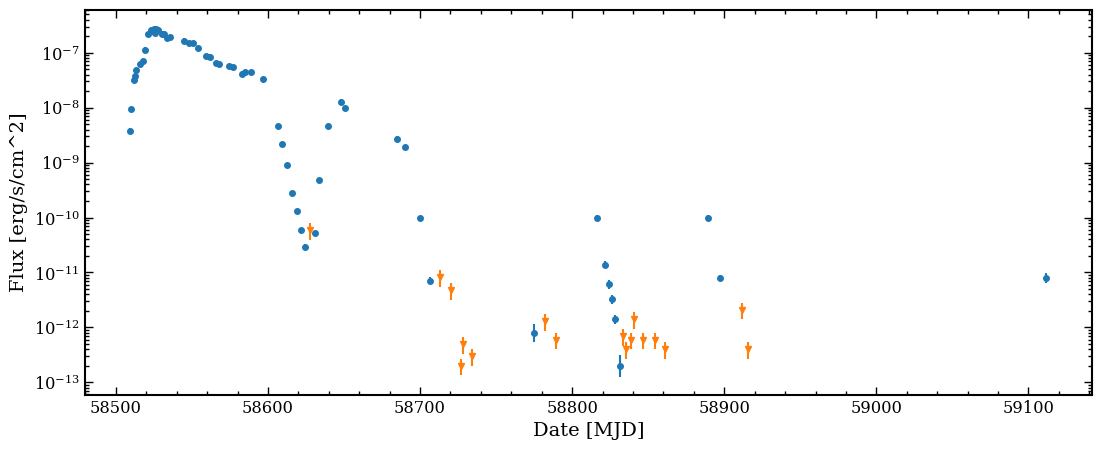

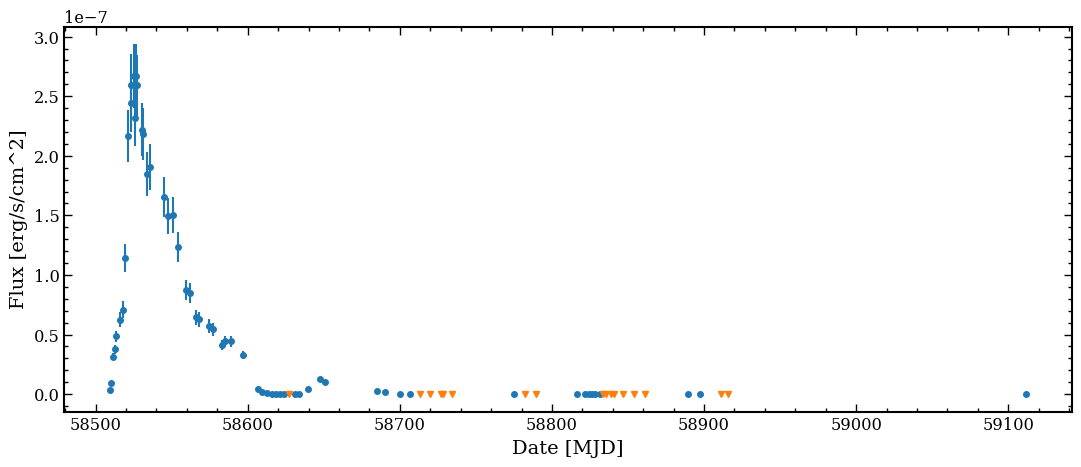

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

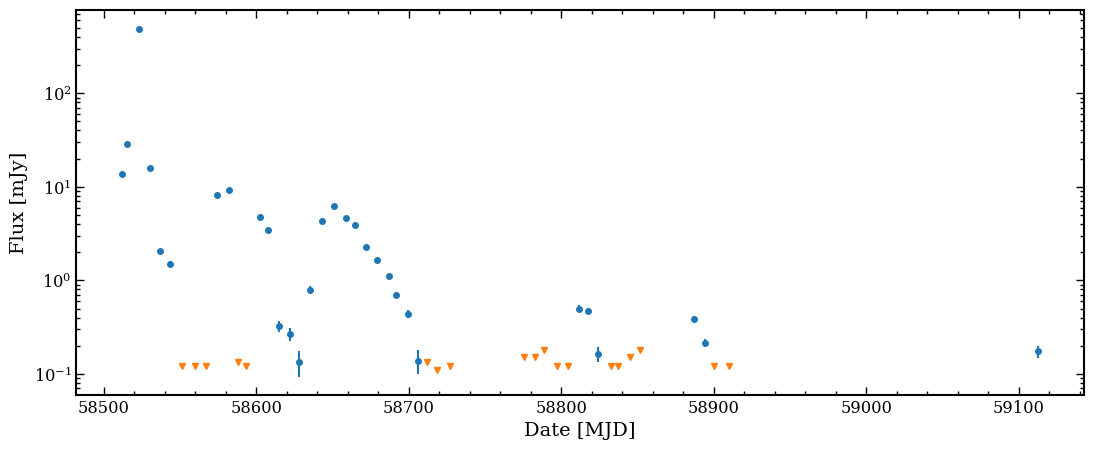

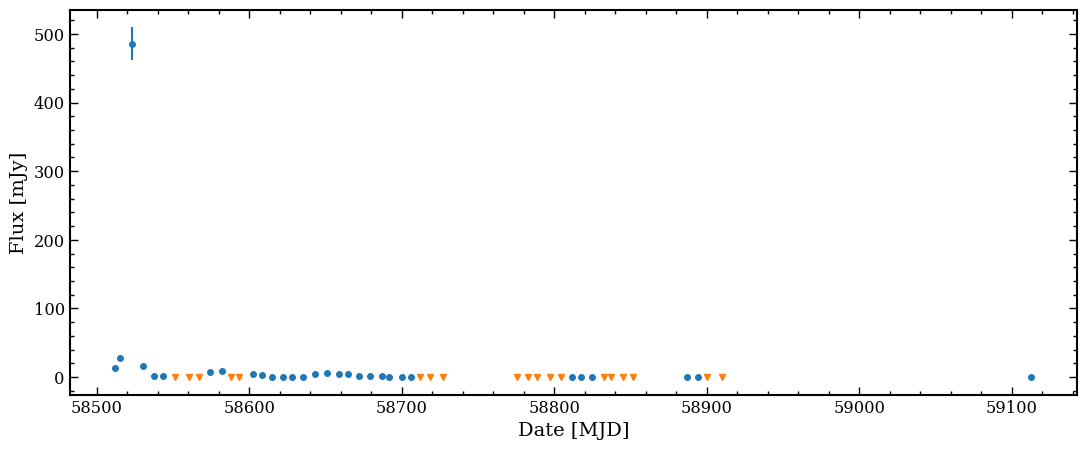

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58512.029000000     13.70000            0.68675             2         3.39204e-08                   2.41211e-09                   2.41223e-09                   False          False          HS             
58515.161000000     28.57000            1.43353             1         6.25300e-08                   6.25515e-09                   6.25642e-09                   False          False          HS             
58523.219000000     485.60000           24.33266            2         2.51420e-07                   1.78400e-08                   1.78400e-08                   False          False          SS             
58530.114000000     16.03000            0.81542             1         2.21700e-07                   2.21863e-08                   2.21863e-08                   False          F

In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

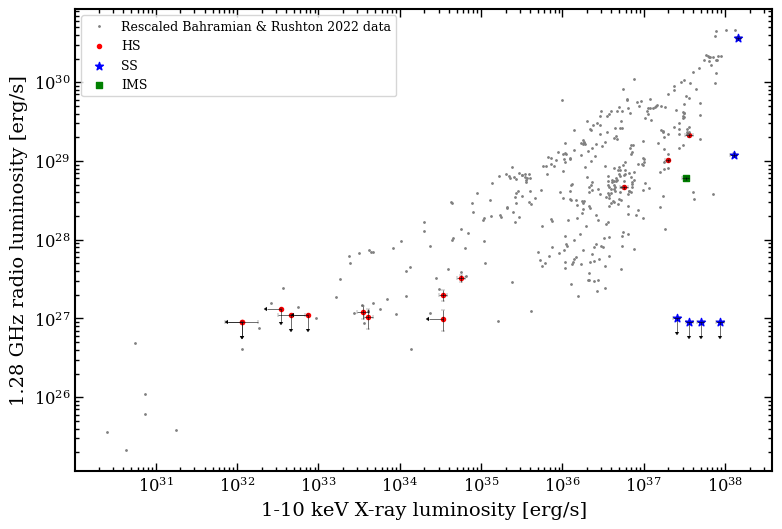

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

In [11]:
plot_Lr_Lx_plotly(paired_data, colourby="state")

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  1204
58512.029: time_to_nearest: 0.4126500000056694 & time_to_furthest: 0.41537999999854947; y_predict_err: 0.03448346129376123
58515.161: time_to_nearest: 0.6242500000007567 & time_to_furthest: 2.0494200000030105; y_predict_err: 0.042791715291246035
58523.219: time_to_nearest: 0.21357999999599997 & time_to_furthest: 0.23505999999906635; y_predict_err: 0.032881697566560675
58530.114: time_to_nearest: 0.17723000000114553 & time_to_furthest: 2.670689999999013; y_predict_err: 0.04709904941275589
58537.092: time_to_nearest: 1.288219999994908 & time_to_furthest: 7.858190000006289; y_predict_err: 0.04789082228966901
58543.076: time_to_nearest: 1.8741900000022724 & time_to_furthest: 7.272219999998924; y_predict_err: 0.04758239683504861
58551.1: time_to_nearest: 0.5353299999987939 & time_to_furthest: 2.77672000000166; y_predict_err: 0.04286495184154049
58560.075: time_to_nearest: 0.814909999993688 & time_to_furthest: 1.9766000000017812; y_predic

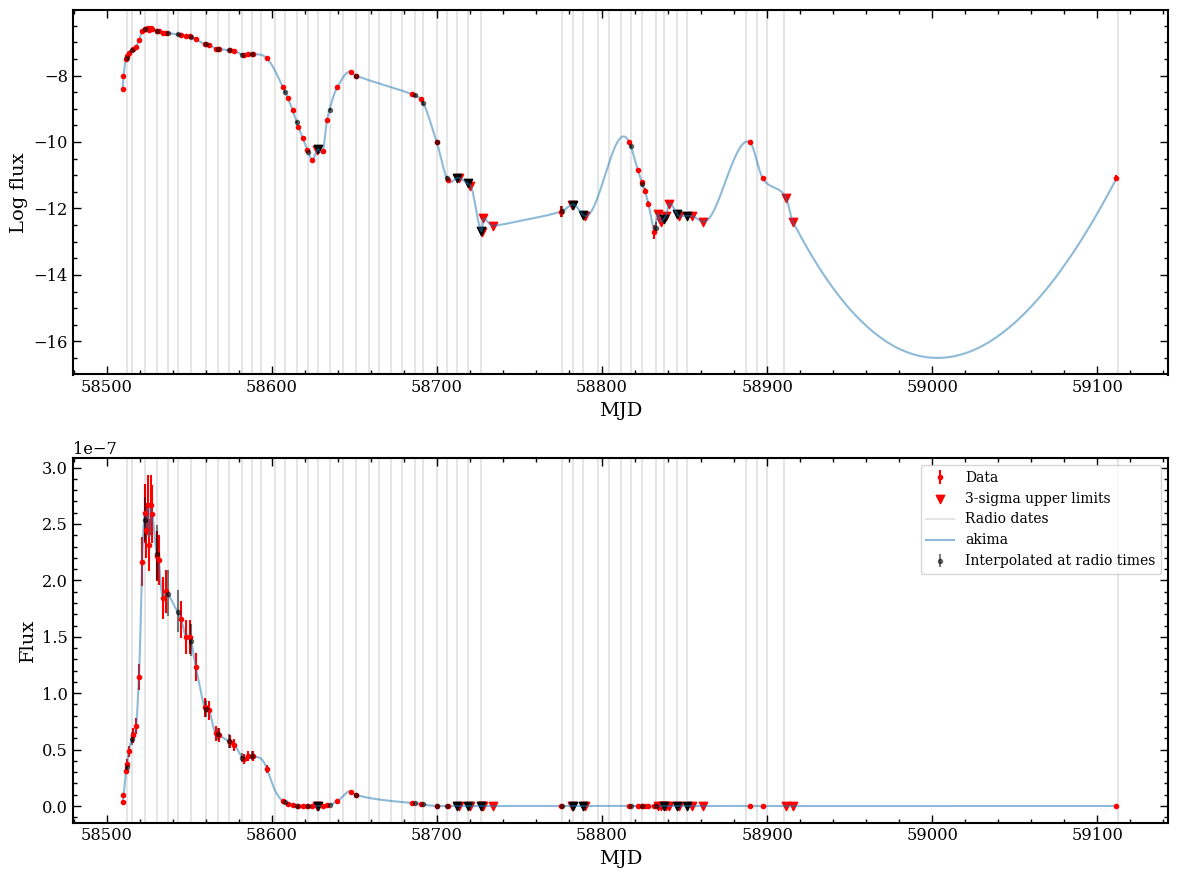

Number of used interpolated data points:  34
Converting to luminosity using d_kpc = 2.2


In [12]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

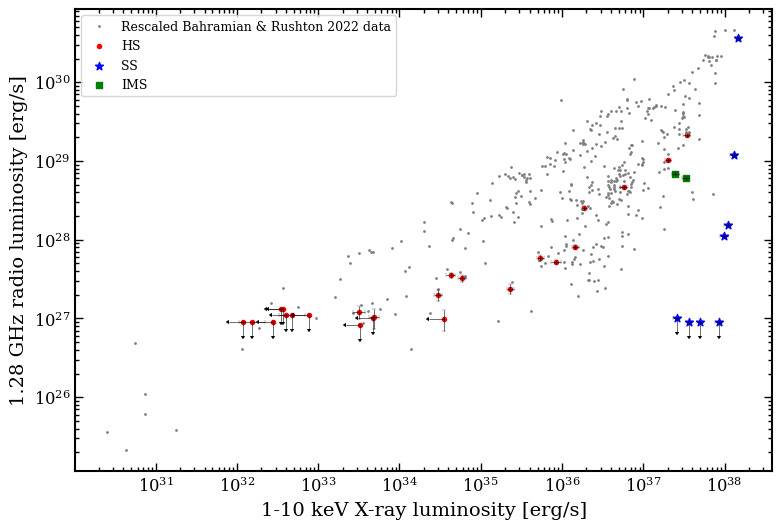

In [13]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

---

# Comparison to Francesco's Paper
Note that:
- This is data from the table in the supplementary material, for comparison with the plot in the paper. 
- This includes ATCA data.
- The data aare 5 GHz. 
- I was more aggressive in filtering the interpolation than these authors were. 

In [23]:
fran_data = pd.read_csv('../DATA/OTHER/MAXI J1348-630_paired_Fr_Fx_Fran_all_telescopes.csv', header=0, sep = ',')

fx = fran_data["Fx"].to_numpy()
fx_unc_l = fran_data["Fx_unc_l"].to_numpy()
fx_unc_u = fran_data["Fx_unc_u"].to_numpy()
fx_uplims_mask = fran_data["Fx_uplim"].notna()
fx[fx_uplims_mask] = fran_data["Fx_uplim"][fx_uplims_mask]
fx_unc_l[fx_uplims_mask] = fran_data["Fx_uplim"][fx_uplims_mask]/3
fx_unc_u[fx_uplims_mask] = 0

# Assume a flat spectral index
fr = fran_data["Fr"].to_numpy()
fr_unc = fran_data["Fr_unc"].to_numpy()
fr_uplims_mask = fran_data["Fr_uplim"].notna()
fr[fr_uplims_mask] = fran_data["Fr_uplim"][fr_uplims_mask]
fr_unc[fr_uplims_mask] = fran_data["Fr_uplim"][fr_uplims_mask]/3

d_kpc = source_df["D"][0]
d_kpc_unc = 0 # kpc
lr_fran, lr_unc_fran = convert_Fr(fr ,fr_unc,d_kpc,d_kpc_unc, nu_GHz=1.28) 
lr_fran_uplim = fr_uplims_mask

lx_fran, lx_unc_l_fran, lx_unc_u_fran = convert_Fx(fx,fx_unc_l,fx_unc_u,d_kpc,d_kpc_unc)
lx_fran_uplim = fx_uplims_mask

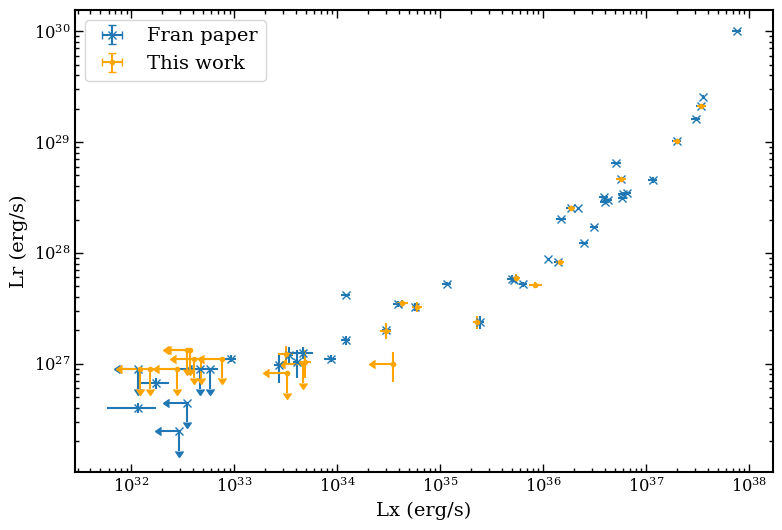

In [28]:
# Compare to my interpolated results

filtered_data = interpolated_data[interpolated_data["state"].isin(["HS", "QS"])]
lx = filtered_data["Lx"]
lr = filtered_data["Lr"]
lx_er_l = filtered_data["Lx_unc_l"]
lx_er_u= filtered_data["Lx_unc_u"]
lr_er= filtered_data["Lr_unc"]
lx_uplim = filtered_data["Fx_uplim_bool"]
lr_uplim = filtered_data["Fr_uplim_bool"]

fig= plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.errorbar(lx_fran,lr_fran, yerr=lr_unc_fran, xerr=[lx_unc_l_fran,lx_unc_u_fran], uplims=lr_fran_uplim, xuplims=lx_fran_uplim, marker="x", linestyle="none", label="Fran paper")
plt.errorbar(lx,lr, yerr=lr_er, xerr=[lx_er_l,lx_er_u], uplims=lr_uplim, xuplims=lx_uplim, marker="o", linestyle="none", color="orange", markersize=3, label="This work")


plt.xlabel("Lx (erg/s)")
plt.ylabel("Lr (erg/s)")
plt.legend()

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)

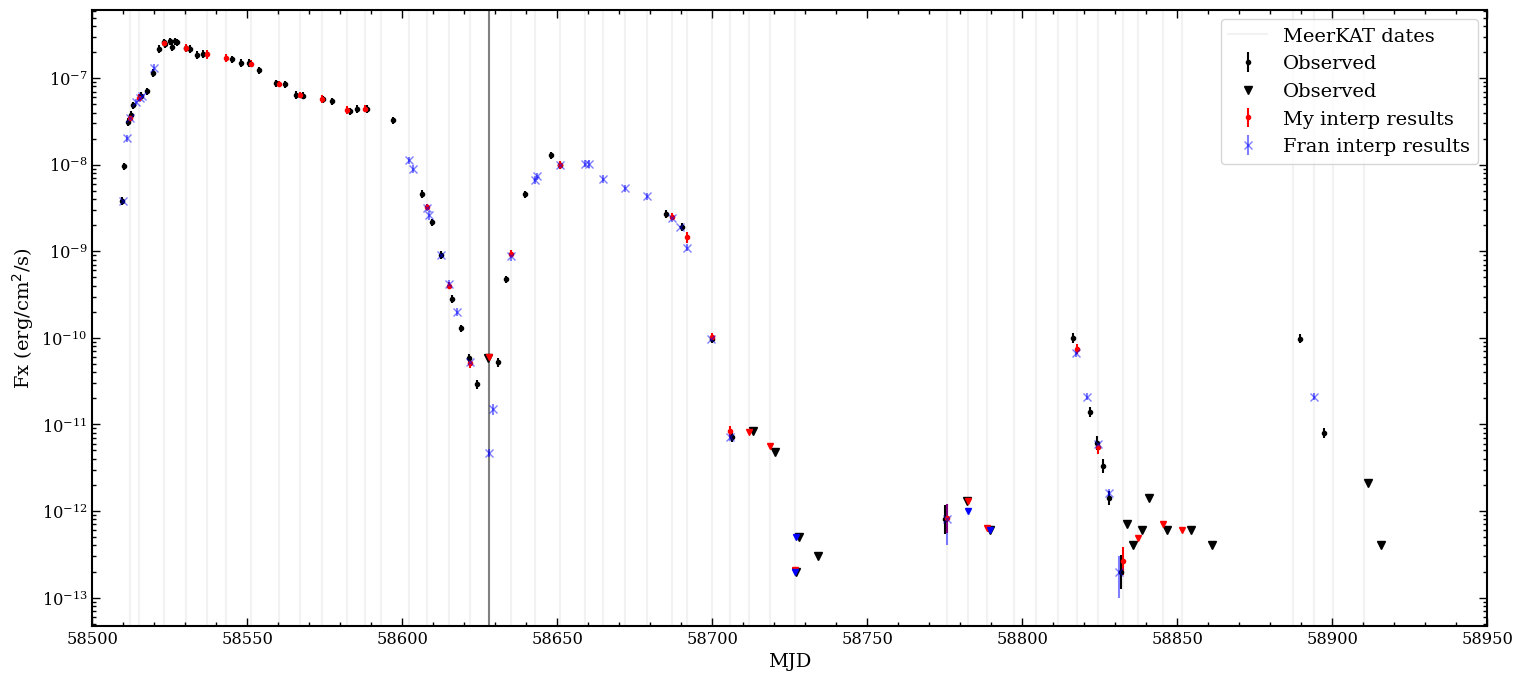

In [34]:
# Compare light curves, just for the Swift data

fig=plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)


## Original data
xdata = xray_df["t_xray"]
ydata =  xray_df["Fx"]
yunc_l = xray_df["Fx_unc_l"]
yunc_u = xray_df["Fx_unc_u"]
uplims = xray_df["Fx_uplim_bool"]
radio_dates = radio_df["t_radio"]
plt.errorbar(xdata[~uplims], ydata[~uplims], yerr=[yunc_l[~uplims], yunc_u[~uplims]], fmt='.', label="Observed", color="black")
plt.errorbar(xdata[uplims], ydata[uplims], fmt='v', label="Observed", color="black")
for i, mjd in enumerate(radio_dates) :
    if i==0: plt.axvline(x = mjd, color = 'grey', alpha=0.1, label="MeerKAT dates")
    else:  plt.axvline(x = mjd, color = 'grey', alpha=0.1)


## My interpolated X-ray results
xdata = interpolated_data["t"]
ydata = interpolated_data["Fx"]
uplims = interpolated_data["Fx_uplim_bool"]
yunc_l = interpolated_data["Fx_unc_l"]
yunc_u = interpolated_data["Fx_unc_u"]
plt.errorbar(xdata[~uplims], ydata[~uplims], yerr=[yunc_l[~uplims], yunc_u[~uplims]], fmt='.', label="My interp results", color="red")
plt.errorbar(xdata[uplims], ydata[uplims], fmt='v', color="red", markersize=4)
plt.axvline(58628.019, color="grey")


## Plotting Fran's interpolated X-ray fluxes
xdata = fran_data["t"]
ydata = fran_data["Fx"]
uplims = fran_data["Fx_uplim"].notna()
yunc_l = fran_data["Fx_unc_l"]
yunc_u = fran_data["Fx_unc_u"]
plt.errorbar(xdata[~uplims], ydata[~uplims], yerr=[yunc_l[~uplims], yunc_u[~uplims]], fmt='x', label="Fran interp results", color="blue", alpha=0.5)
plt.errorbar(xdata[uplims], ydata[uplims], fmt='v', color="blue", markersize=4)


ax.set_yscale("log", base=10)
plt.xlabel("MJD")
plt.ylabel("Fx (erg/cm$^2$/s)")
plt.xlim([58500,58950])
plt.legend()
plt.show()